In [1]:
import glob
import os
import numpy as np
import datetime
from netCDF4 import Dataset
import scipy.io
import h5py
from pyproj import Proj, Transformer
import cartopy.crs as ccrs
import cartopy
from scipy.spatial.kdtree import KDTree
import xarray as xr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

/var/folders/_1/fh2vf5m57871c546k_sf7xr80000gn/T/ipykernel_2768/1085768627.py:11: DeprecationWarning: Please use `KDTree` from the `scipy.spatial` namespace, the `scipy.spatial.kdtree` namespace is deprecated.
  from scipy.spatial.kdtree import KDTree


### function to find nearest EASE grid cell for buoy coords

In [2]:
def lonlat_to_xy(coords_1, coords_2, hemisphere, inverse=False):

    """Converts between longitude/latitude and EASE xy coordinates.
 
    Args:
        lon (float): WGS84 longitude
        lat (float): WGS84 latitude
        hemisphere (string): 'n' or 's'
        inverse (bool): if true, converts xy to lon/lat
 
    Returns:
        tuple: pair of xy or lon/lat values
    """

    EASE_Proj = {'n': 'EPSG:3408',
                 's': 'EPGS:3409'}
    
    WGS_Proj = 'EPSG:4326'
    
    for coords in [coords_1, coords_2]: assert isinstance(coords,(np.ndarray,list))

    if inverse == False: # lonlat to xy
        
        lon, lat = coords_1, coords_2
        
        transformer = Transformer.from_crs(WGS_Proj, EASE_Proj[hemisphere])
        
        x, y = transformer.transform(lat, lon)
        
        return (x, y)

    else: # xy to lonlat
        
        x, y = coords_1, coords_2
        
        transformer = Transformer.from_crs(EASE_Proj[hemisphere], WGS_Proj)
        
        lat, lon = transformer.transform(x, y)
        
        return (lon, lat)

### load BGEP buoy data, regrid and combine into one file

In [3]:
# load ease lons,lats:
ease_lats = np.asarray(Dataset('/Users/carmennab/Dropbox/alpha_retracker/data/snow/SMLG_ERA5_01Jan2010-31Jul2021.nc')['Latitude'])
ease_lons = np.asarray(Dataset('/Users/carmennab/Dropbox/alpha_retracker/data/snow/SMLG_ERA5_01Jan2010-31Jul2021.nc')['Longitude'])

# convert into x,y:
ease_x, ease_y = lonlat_to_xy(ease_lons,ease_lats,hemisphere='n')

# create KDTree to find EASE grid cell closest to buoy:
tree = KDTree(list(zip(ease_x.ravel(),ease_y.ravel())))

In [4]:
### ULS_A
a_days = [np.arange(272,575), # 30/09/10 - 30/07/11 
        np.arange(575,954), # 31/07/11 - 12/08/12 
        np.arange(956,1322), # 14/08/12 - 14/08/13
        np.arange(1322,1735), # 15/08/13 - 01/10/14
        np.arange(1735,2105), # 02/10/14 - 06/10/15
        np.arange(2107,2472), # 09/10/15 - 07/10/16
        np.arange(2473,2821), # 09/10/16 - 21/09/17
        np.arange(2824,3190), # 25/09/17 - 25/09/18
        np.arange(3190,4230)] # 26/09/18 - 28/08/21

buoya_lats = [75.009183333333333334,
        74.9996116666666667,
        75.00011,
        74.9928966666666667,
        75.20733333333333333,
        75.13928333333333333,
        75.0045,
        75.17366666666666666,
        75.00013166666666666667
        ]

buoya_lons = [-149.9790683333333332,
        -149.9775783333333333,
        -150.0057833333333333334,
        -149.98059,
        -149.9562083333333334,
        -149.91972,
        -149.9994316666666668,
        -150.144865,
        -149.9994316666666668
       ]

In [5]:
### ULS_B
b_days = [np.arange(276,578), # 04/10/10 - 02/08/11 
        np.arange(579,967), # 03/08/11 - 25/08/12 
        np.arange(972,1329), # 30/08/12 - 21/08/13
        np.arange(1329,1742), # 22/08/13 - 08/10/14
        np.arange(1743,2099), # 10/10/14 - 30/09/15
        np.arange(2107,2469), # 09/10/15 - 04/10/16
        np.arange(2470,2819), # 06/10/16 - 19/09/17
        np.arange(2820,3187), # 21/09/17 - 22/09/18
        np.arange(3188,4133)] # 24/09/18 - 25/04/21

buoyb_lats = [77.9885433333333332,
        78.448,
        77.999905,
        77.991935,
        78.11096666666666666,
        77.9998783333333333,
        77.9976916666666666,
        78.1748,
        78.5498333333333333
        ]

buoyb_lons = [-149.96996,
        -149.9773016666666666,
        -149.9987366666666667,
        -150.5396666666666666,
        -149.9974283333333333,
        -149.998791666666666,
        -149.9611583333333334,
        -149.9786983333333334,
        -149.9641433333333332
       ]

In [6]:
### ULS_D
d_days = [np.arange(283,587), # 11/10/10 - 12/08/11 
        np.arange(589,964), # 13/08/11 - 22/08/12 
        np.arange(965,1317), # 23/08/12 - 09/08/13
        np.arange(1317,1731), # 10/08/13 - 27/09/14
        np.arange(1732,2111), # 29/09/14 - 12/10/15
        np.arange(2112,2478), # 14/10/15 - 13/10/16
        np.arange(2479,2825), # 15/10/16 - 25/09/17
        np.arange(2827,3179), # 28/09/17 - 14/09/18
        np.arange(3180,4230)] # 16/09/18 - 20/08/21

buoyd_lats = [73.9990766666666666,
        73.99415,
        73.99411,
        73.9963333333333334,
        74.30883333333333333,
        73.9998,
        74.000008333333333333334,
        74.0043333333333333335,
        74.32333333333333334
        ]

buoyd_lons = [-139.983395,
        -139.98405,
        -139.9807383333333333,
        -139.9466666666666667,
        -140.6235,
        -140.10768333333333334,
        -139.99985,
        -139.9993333333333334,
        -140.00012166666666666667
       ]

In [ ]:
buoys = ['ULS_A', 'ULS_B', 'ULS_D']
snow = 'SMLG_ERA5'
buoy_days = [a_days,b_days,d_days]
b_lons = [buoya_lons,buoyb_lons,buoyd_lons]
b_lats = [buoya_lats,buoyb_lats,buoyd_lats]
rho_w = 1030
rho_i = 900

datapath = '/Users/carmennab/Dropbox/alpha_retracker/data/snow/'
sden = np.array(Dataset(datapath+snow+'_01Jan2010-31Jul2021.nc')['Snow Density'])
snod = np.array(Dataset(datapath+snow+'_01Jan2010-31Jul2021.nc')['Snow Depth'])

### the buoys are active for different dates, so have to be processed seperately 
for days, buoy_lats, buoy_lons, buoy in zip(buoy_days,b_lats,b_lons,buoys):
    datapath = '/Users/carmennab/Dropbox/alpha_retracker/data/validation/BGEP/'+buoy+'/'

    files = sorted(glob.glob(datapath+'*.mat'))

    ### create massive array to put data into:
    all_sits = np.full(4230,np.nan) # 1 Jan 2010 - 31 July 2021
    all_lats = np.full(4230,np.nan) # 1 Jan 2010 - 31 July 2021
    all_lons = np.full(4230,np.nan) # 1 Jan 2010 - 31 July 2021

    for count, day in enumerate(days):

        ### older files require scipy.io, newer ones h5py
        if count<2:
            file = scipy.io.loadmat(files[count])
            drafts = file['IDS'][:,1] # load sea ice draft
            std = file['IDS'][:,2][:len(day)] # load standard deviation

        else:
            with h5py.File(files[count], 'r') as f:
                drafts = np.array(f['IDS'][1])[:len(day)] # load sea ice draft      
                std = np.array(f['IDS'][2])[:len(day)] # load standard deviation

        # convert lon,lat into x,y:
        buoy_x,buoy_y = lonlat_to_xy(np.array(buoy_lons[count]),
                               np.array(buoy_lats[count]),
                               hemisphere='n')

        dist, ind = tree.query([buoy_x,buoy_y])

        ind2d = np.unravel_index(ind, (ease_lats.shape[0],ease_lats.shape[1]))

        print(ind2d)

        hs = snod[day,ind2d[0],ind2d[1]]
        rho_s = sden[day,ind2d[0],ind2d[1]]

        fb = ((drafts*(rho_w-rho_i))-(hs*rho_s)) / rho_i

        sits = ((fb*rho_w) + (hs*rho_s)) / (rho_w - rho_i) # sea ice thickness 

        # place buoy data onto ease grid        
        all_sits[day] = sits
        all_lons[day] = ease_lons[ind2d]
        all_lats[day] = ease_lats[ind2d]

    all_sits[all_sits<0.01] = np.nan # mask out funky numbers
    all_sits[all_sits>4] = np.nan # remove SITS > 4m

    # turn into one large NETCDF and save
    dayss = np.arange(0,len(all_sits))

    data_vars = {'Sea Ice Thickness':(['t'],all_sits[:4230]),
                'Latitude':(['t'],all_lats[:4230]),
                'Longitude':(['t'],all_lons[:4230])}
    ds = xr.Dataset(data_vars = data_vars,
                    coords={'Day':(['t'],dayss[:4230])},
                    )
    filename = datapath + snow +'_SIT_EASE_01Jan2010-31Jul2021.nc'
    ! rm {filename}
    ds.to_netcdf(filename,'w')

    means = []
    for s in all_sits:
        means.append(np.nanmean(s))
    m = np.asarray(means)

    plt.plot(means)
    plt.ylabel('SIT (m)')
    plt.xlabel('Day')
    plt.title(buoy)
    plt.show() 

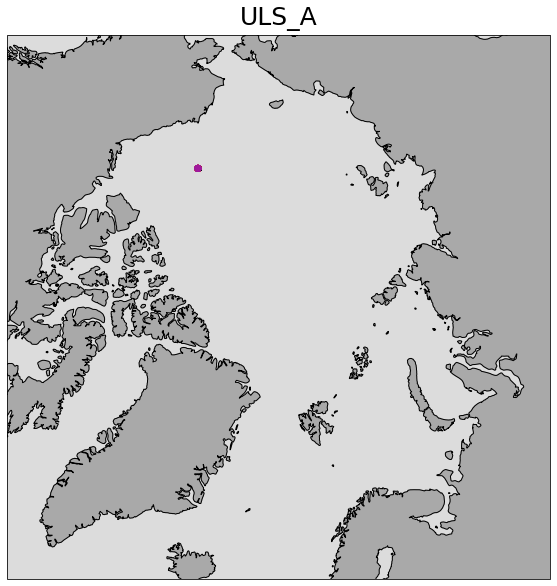

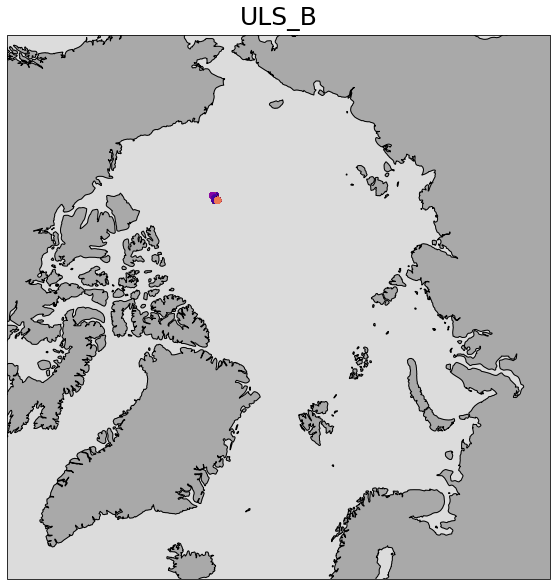

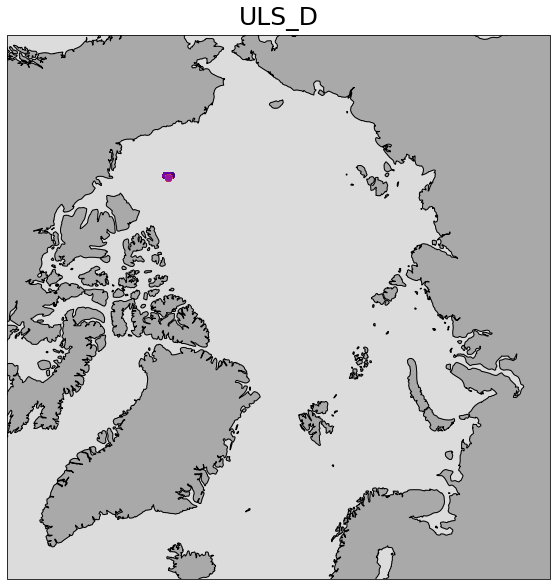

In [11]:
buoys = ['ULS_A','ULS_B','ULS_D']
datapath = '/Users/carmennab/Dropbox/alpha_retracker/data/validation/BGEP/'

for counter,buoy in enumerate(buoys):
    fig = plt.figure(figsize=(10,10))
    file = Dataset(datapath+buoy+'/'+snow+'_SIT_EASE_01Jan2010-31Jul2021.nc')
    sit = np.array(file['Sea Ice Thickness'])
    lons = np.array(file['Longitude'])
    lats = np.array(file['Latitude'])
    ax = fig.add_subplot(projection=ccrs.NorthPolarStereo())
    ax.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=1)
    ax.add_feature(cartopy.feature.OCEAN, color='gainsboro', edgecolor='black')
    ax.set_extent([-180, 180, 90, 65], ccrs.PlateCarree())
    ax.coastlines()  
    ax.scatter(lons,lats,c=sit,cmap='plasma',vmin=0,vmax=3,transform=ccrs.PlateCarree())
    ax.set_title(buoy,fontsize=25, pad=10)
    plt.show()